Assignment 3 - BSAN745 - Ludlow

Problem 1

Printing list of Sully reviews, docs1:
['""Everything is unprecedented until it happens for the first time."Sully (Tom Hanks)On January 15, 2009, a decidedly un-cinematic hero, Captain Chesley"Sully" Sullenberger of US Airways, landed 155 souls into the HudsonRiver, safely, as he struggled with a plane crippled by birds in bothengines. As we all know, the passengers and crew survived, so what doesdirector Clint Eastwood bring to the big screen that could engage anaudience knowing the blessed outcome? First, he brings Tom Hanks, not unknown to portray low-key heroes (seeBridge of Spies and Captain Phillips most recently), whose understatedcourage seems accurately to reflect the Sully we have come to know andsee displayed with the credits. Second, Eastwood crafts one of the mostbelievable crash and rescue scenes I have ever encountered.As in the authentic Hanks interpretation of the quiet Sully, thedisaster is compelling and understated. No swelling or morbid musictakes away from the ter

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'el', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh'] not in stop_words.
  warnings.warn(


Printing dtm1:
  (0, 6964)	1
  (0, 2829)	1
  (0, 6653)	1
  (0, 6723)	2
  (0, 2819)	1
  (0, 3567)	1
  (0, 1616)	1
  (0, 6900)	1
  (0, 2942)	3
  (0, 1103)	2
  (0, 1223)	1
  (0, 6030)	1
  (0, 233)	1
  (0, 3709)	1
  (0, 5783)	1
  (0, 3121)	1
  (0, 5395)	1
  (0, 5972)	1
  (0, 4859)	1
  (0, 1545)	1
  (0, 869)	1
  (0, 943)	1
  (0, 3675)	3
  (0, 4729)	2
  (0, 1535)	2
  :	:
  (173, 5185)	1
  (173, 3053)	1
  (173, 5429)	1
  (173, 3887)	1
  (173, 4627)	1
  (173, 5477)	1
  (173, 938)	2
  (173, 2411)	1
  (173, 6178)	1
  (173, 5062)	1
  (173, 6887)	1
  (173, 2865)	1
  (173, 7205)	1
  (173, 2201)	1
  (173, 757)	1
  (173, 7174)	1
  (173, 1711)	1
  (173, 6960)	1
  (173, 5374)	1
  (173, 2812)	1
  (173, 5167)	1
  (173, 1275)	1
  (173, 5311)	1
  (173, 5542)	1
  (173, 4134)	1
Printing dict1:
         terms  freq
3876      look    50
4277      need    47
7455      year    47
5502    second    47
3247     incid    46
...        ...   ...
2940    herjob     1
2939  herepres     1
2938    hereof     1
2937    

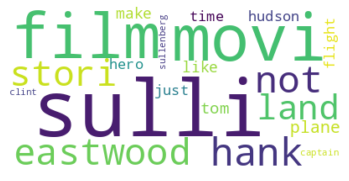

In [32]:
#1.1 docs1: make a list of Sully reviews

import pandas as pd # for reading dataframes
import regex as re
import numpy as np
import sklearn as sk

# get sully.csv into df, then into a list of reviews

docs1 = [] # future list

# put file into dataframe
df = pd.read_csv("sully.csv")
print("Printing list of Sully reviews, docs1:")
docs1 = df['review'].tolist() # make a list
print(docs1)


# 1.2 mystopwords: make a vector of default stopwords but not "not" and "*n't"

from nltk.stem import PorterStemmer
from string import punctuation, digits
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

ps = PorterStemmer() # stemming
                          # documentations says it makes words all lowercase
                          # in addition to reducing words to their root words
                          # need to ck

# Pre-Processing requirements:
#1.2.1. turn all letters to lowercase <- done
#1.2.2. remove punctuation and numbers <- done
#1.2.3. remove default stop words excludingg "not" & "*n't" # skipping not needed
#1.2.4. remove extra blank spaces <- done
#1.2.5. apply stemming - ps <- done
#1.2.6. generate unigrams <- done

# make preprocessing function
def preprocess_text(text):
  text = text.lower() # make everything lower case
  text = text.translate(str.maketrans('','', digits)) # take out digits
  text = text.translate(str.maketrans('','', punctuation)) # take out punctuation
  text = re.sub(' +', ' ', text).strip() # remove extra spaces
  t_list = text.split(" ")
  text = " ".join(ps.stem(word) for word in t_list) #stemming & tokenizing
  return text

mystopwords = list(ENGLISH_STOP_WORDS)
mystopwords.remove("not")
mystopwords = [word for word in mystopwords if not word.endswith("n't")]

# stem stopwords
mystopwords = [ps.stem(word) for word in mystopwords]

print("Printing mystopwords:")
print(mystopwords)

# 1.3 dtm1: filter and make a dtm using preprocessing criteria
cv = CountVectorizer(preprocessor=preprocess_text, stop_words = mystopwords,
                     ngram_range=(1,1))

dtm1 = cv.fit_transform(docs1)

print("Printing dtm1:")
print(dtm1)

# 1.4 tf_dict1: make a python dictionary with terms as keys and freq of terms as values
tf_dict1 = {}
terms = cv.get_feature_names_out()
freq_sum = dtm1.sum(axis=0)[0].tolist()[0] # to make a list to select first element
dict1 = pd.DataFrame({"terms":terms, "freq":freq_sum})
dict1 = dict1[dict1['freq']<=50]
dict1.sort_values("freq",ascending=False,inplace=True)

print("Printing dict1:")
print(dict1)

# 1.5 worldcld: make a WordCloud with specific call, and other listed specs
from wordcloud import WordCloud
import matplotlib.pyplot as plt

terms = cv.get_feature_names_out()
freq_sum = dtm1.sum(axis=0)[0].tolist()[0]
dict1 = dict(zip(terms, freq_sum))
worldcld = WordCloud(background_color = "white", max_words = 20, random_state = 9)
worldcld.generate_from_frequencies(dict1)
# show
print("Printing a WordCloud:")
plt.imshow(worldcld, interpolation = "bilinear")
plt.axis("off")
plt.show()




Problem 2

Printing list of Sully reviews, docs1:
['""Everything is unprecedented until it happens for the first time."Sully (Tom Hanks)On January 15, 2009, a decidedly un-cinematic hero, Captain Chesley"Sully" Sullenberger of US Airways, landed 155 souls into the HudsonRiver, safely, as he struggled with a plane crippled by birds in bothengines. As we all know, the passengers and crew survived, so what doesdirector Clint Eastwood bring to the big screen that could engage anaudience knowing the blessed outcome? First, he brings Tom Hanks, not unknown to portray low-key heroes (seeBridge of Spies and Captain Phillips most recently), whose understatedcourage seems accurately to reflect the Sully we have come to know andsee displayed with the credits. Second, Eastwood crafts one of the mostbelievable crash and rescue scenes I have ever encountered.As in the authentic Hanks interpretation of the quiet Sully, thedisaster is compelling and understated. No swelling or morbid musictakes away from the ter

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'el', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh'] not in stop_words.
  warnings.warn(


Printing dtm2:
  (0, 21459)	1
  (0, 8597)	1
  (0, 20737)	1
  (0, 20853)	1
  (0, 8526)	1
  (0, 10419)	1
  (0, 4162)	1
  (0, 21326)	1
  (0, 8834)	1
  (0, 2504)	1
  (0, 2934)	1
  (0, 18837)	1
  (0, 739)	1
  (0, 11050)	1
  (0, 18070)	1
  (0, 9353)	1
  (0, 16914)	1
  (0, 18694)	1
  (0, 15029)	1
  (0, 3941)	1
  (0, 1992)	1
  (0, 2191)	1
  (0, 10863)	1
  (0, 14409)	1
  (0, 3921)	1
  :	:
  (173, 22020)	1
  (173, 4528)	1
  (173, 2182)	2
  (173, 11838)	1
  (173, 21451)	1
  (173, 19640)	1
  (173, 16848)	1
  (173, 20849)	1
  (173, 8514)	1
  (173, 16157)	1
  (173, 16991)	1
  (173, 8654)	1
  (173, 21307)	1
  (173, 17239)	1
  (173, 3077)	1
  (173, 16582)	1
  (173, 12041)	1
  (173, 17439)	1
  (173, 12941)	1
  (173, 15762)	1
  (173, 14217)	1
  (173, 1657)	1
  (173, 12734)	1
  (173, 13626)	1
  (173, 16209)	1
Printing Ctf2:
                terms  freq
20844        tom hank   137
3100   clint eastwood    96
9316     hudson river    63
3       aaron eckhart    49
22005      water land    40
...            

<ipython-input-33-26d78140174f>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terms2.sort_values("freq", ascending=False,inplace=True)


Text(0.5, 1.0, 'Bigram Term Frequency')

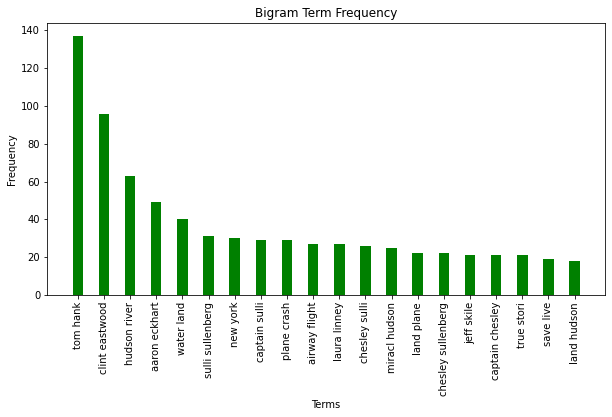

In [33]:
# same thing but with bigrams

#2.0 make a list of Sully reviews

import pandas as pd # for reading dataframes
import regex as re
import numpy as np
import sklearn as sk

# get sully.csv into df, then into a list of reviews

docs2 = [] # future list

# put file into dataframe
df2 = pd.read_csv("sully.csv")
print("Printing list of Sully reviews, docs1:")
docs2 = df2['review'].tolist() # make a list
print(docs2)


# 2.0.1 mystopwords: make a vector of default stopwords but not "not" and "*n't"

from nltk.stem import PorterStemmer
from string import punctuation, digits
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ps = PorterStemmer() # stemming
                          # documentations says it makes words all lowercase
                          # in addition to reducing words to their root words
                          # need to ck

# Pre-Processing requirements:
# turn all letters to lowercase
# remove punctuation and numbers
# remove default stop words excludingg "not" & "*n't" # skipping not needed
# remove extra blank spaces
# apply stemming - ps
# generate unigrams

# make preprocessing function
def preprocess_text(text):
  text = text.lower() # make everything lower case
  text = text.translate(str.maketrans('','', digits)) # take out digits
  text = text.translate(str.maketrans('','', punctuation)) # take out punctuation
  text = re.sub(' +', ' ', text).strip() # remove extra spaces
  t_list = text.split(" ")
  text = " ".join(ps.stem(word) for word in t_list) #stemming & tokenizing
  return text

mystopwords = list(ENGLISH_STOP_WORDS)
mystopwords.remove("not")
mystopwords = [word for word in mystopwords if not word.endswith("n't")]

# stem stopwords
mystopwords = [ps.stem(word) for word in mystopwords]
#print("Printing mystopwords:")
#print(mystopwords)


# 2.1 dtm2: filter and make a dtm using preprocessing criteria
cv = CountVectorizer(preprocessor=preprocess_text, stop_words = mystopwords,
                     ngram_range=(2,2))
dtm2 = cv.fit_transform(docs2)
print("Printing dtm2:")
print(dtm2)

# 2.2 Ctf:
terms2 = cv.get_feature_names_out()
freq_sum2 = dtm2.sum(axis=0)[0].tolist()[0] # list within a list to get 1st element
Ctf2 = pd.DataFrame({"terms": terms2,
                              "freq": freq_sum2})
Ctf2.sort_values("freq",ascending=False,inplace=True)
print("Printing Ctf2:")
print(Ctf2)

# 2.3 terms2: and freq2:

terms2 = Ctf2[Ctf2['freq']>=20]
terms2.sort_values("freq", ascending=False,inplace=True)
print("Printing top 20 - terms2:")
print(terms2)
freq2 = Ctf2.nlargest(20,"freq")
print("Printing top 20 - freq2:")
print(freq2)

# 2.4 Histogram plot
bigrams = Ctf2[Ctf2["freq"]>20]["terms"].tolist()
print("Printing bigram list:")
print(bigrams)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
Ctf2.sort_values("freq",ascending=False,inplace=True)
ctf_terms = Ctf2.iloc[:20]["terms"].tolist()
ctf_vals = Ctf2.iloc[:20]["freq"].tolist()


fig = plt.figure(figsize = (10,5))
plt.bar(ctf_terms, ctf_vals, color = 'green',
        width = 0.4)
plt.xticks(rotation = 90)
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title("Bigram Term Frequency")





Problem 3

In [ ]:
#3.0 prep 

import pandas as pd # for reading dataframes
import nltk
nltk.download('vader_lexicon')
#!pip install NRCLex
nltk.download('punkt')
from nltk import tokenize

# 3.1 sentiment_score: list of compound sentiments
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

Complaints_df = pd.read_csv("Complaints.csv", encoding="latin1")

sentiment_score = []

for complaint in Complaints_df['Consumer.complaint.narrative']:
  score = sia.polarity_scores(complaint)['compound']
  sentiment_score.append(score)

print("Printing sentiment_scores:")
print(sentiment_score)


# 3.2 doc_score_df:
doc_score_df = pd.DataFrame({"Complaints":Complaints_df["Consumer.complaint.narrative"], 
                             "Sentiment_Score": sentiment_score})
print("Printing doc_score_df:")
print(doc_score_df)


# 3.3 Common elements to 5 most negative complaints
doc_score_df.sort_values(by = "Sentiment_Score", inplace=True)

pd.set_option('display.max_colwidth', None)
print("Printing 5 most negative complaints:")
print(doc_score_df.head(5))
print("Complaint words include: sickened, fretful, fraud, abusive, crying, horror. Highly negative sentiment.")




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Printing sentiment_scores:
[0.25, 0.7443, 0.1197, -0.8806, -0.7714, 0.9587, 0.8351, -0.3818, -0.8416, 0.743, 0.5216, -0.6312, -0.5919, -0.9751, -0.9803, 0.6486, 0.9871, 0.9388, 0.8355, 0.8402, 0.9343, 0.9023, 0.9987, 0.9333, 0.6597, 0.9169, -0.7684, -0.1241, 0.296, 0.6672, -0.2378, 0.6235, 0.7814, -0.0772, -0.3288, -0.9648, 0.9636, 0.928, 0.9923, 0.9216, 0.9592, 0.7906, -0.9913, -0.3315, 0.7108, 0.8956, 0.796, 0.7096, 0.6369, -0.6187, 0.9823, 0.6597, -0.1531, 0.9942, -0.6852, -0.9823, -0.5423, -0.2896, 0.354, 0.9735, 0.3818, 0.2732, 0.9217, 0.6854, 0.3293, 0.4939, -0.34, 0.8504, -0.2748, -0.9584, 0.9468, 0.8984, 0.9559, -0.9907, -0.4194, 0.551, -0.2471, 0.9882, -0.7907, 0.9877, 0.997, 0.8316, 0.0387, 0.4215, -0.4404, 0.9511, 0.6436, 0.5859, 0.5267, -0.9455, 0.9556, 0.6486, -0.7975, 0.982, 0.2558, -0.9347, -0.993, 0.9335, 0.8541, -0.7604, 0.9533, 0.801, -0.1655, -0.4371, 0.9104, -0.7783, 0.5859, -0.5587, 0.5988, -0.3839, -0.6705, -0.2753, -0.9732, 0.9723, 0.7514, 0.9745, 0.9089, 0.4069,

Problem 4

In [36]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

df = pd.read_csv('news_label.csv', encoding="latin1")

def preprocess(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]','',text)
  text = re.sub(r'\d+','',text)
  stopwords_list = stopwords.words('english')
  text = ' '.join([word for word in text.split() if word not in stopwords_list])
  text = text.strip()
  ps = PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

df['Message'] = df['Message'].apply(preprocess)
word_freq = {}
for text in df['Message']:
  for word in text.split():
    if word not in word_freq:
      word_freq[word] = 0
    word_freq[word] += 1
custom_dict = {k:v for k, v in word_freq.items() if v >= 100}

tv = TfidfVectorizer(vocabulary=custom_dict.keys())
dtm = tv.fit_transform(df['Message'])
tv.get_feature_names_out()

k = 10
lsa = TruncatedSVD(n_components=k)
lsa_D = lsa.fit_transform(dtm)
ttm_df = pd.DataFrame(lsa.components_,columns=tv.get_feature_names_out())

# 4.1 term4: For Topic 3:
print("Printing term4, info for Topic 3:")
topic_index = 2
topic = lsa.components_[topic_index]
top_index = np.argsort(-topic)[:10]
top_terms = [list(custom_dict.keys())[i] for i in top_index]
top_scores = [topic[i] for i in top_index]
term4 = pd.DataFrame({'Term': top_terms, 'Score': top_scores})
print(term4)

# 4.2 term5: For Topic 5:
print("Printing info for Topic 5:")
topic_index = 4
topic = lsa.components_[topic_index]
top_idx = np.argsort(-topic)[:10]
top_terms = [list(custom_dict.keys())[i] for i in top_idx]
top_scores = [topic[i] for i in top_idx]
term5 = pd.DataFrame({'Term': top_terms, 'Score': top_scores})
print(term5)

# For Topic 4:
print("Printing info for Topic 4:")
topic_index = 3
topic = lsa.components_[topic_index]
top_idx = np.argsort(-topic)[:10]
top_terms = [list(custom_dict.keys())[i] for i in top_idx]
top_scores = [topic[i] for i in top_idx]
term6 = pd.DataFrame({'Term': top_terms, 'Score': top_scores})
print(term6)

# Since we have topics med and space, to compare 4 and 5, we can look at scores
# of each and compare
print("#5 more med and #4 is more space.")

# 4.4 I am unable to determine which document is most associated with topic 4.
# I don't know how to do this part, I assume I would start with k = number of
# documents. I don't know where to go from there.
print("For the document most associated with topic 4, I am unable to determine this. I assume I would first start with k = count of Messages, but I don't know where to go from there, at this time.")




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Printing term4, info for Topic 3:
      Term     Score
0      msg  0.398953
1     food  0.268287
2     caus  0.124305
3   diseas  0.120992
4  patient  0.118881
5   effect  0.115956
6   doctor  0.112461
7    peopl  0.097430
8     bank  0.094341
9    medic  0.090097
Printing info for Topic 5:
       Term     Score
0    diseas  0.249799
1     space  0.170943
2    inform  0.153069
3     medic  0.152584
4   patient  0.144259
5    effect  0.128151
6  satellit  0.120035
7  research  0.112600
8       ___  0.112403
9   medicin  0.112116
Printing info for Topic 4:
       Term     Score
0       msg  0.656743
1      food  0.375915
2     space  0.203583
3        na  0.111689
4     orbit  0.086169
5    launch  0.080192
6    shuttl  0.064428
7   station  0.061864
8  satellit  0.061396
9       eat  0.060082
#5 more med and #4 is more space.
For the document most associated with topic 4, I am unable to determine this. I assume I would first start with k = count of Messages, but I don't know where to go